In [1]:
#Load wage theft national data
library(data.table)
whd <- as.data.frame(fread("whd_whisard.naicHumanReadableLevels.csv", stringsAsFactors = FALSE,  na.strings = ""))
str(whd)

#Load data dictionary
dd <- fread("whd_dd.csv", na.strings = "")
head(dd)
col <- dd$Column_Name[!is.na(dd$Proposed_User_Friendly_Column_Name)| 
                        dd$Column_Name %in% c("findings_start_date", "findings_end_date")]
col <- c(col, grep("naic", names(whd), value = TRUE)) #also need the naic description variables
col

#Subset whd data to just columns of primary interest
whd <- whd[c(col)]
names(whd) #34 columns

summary(whd)

Read 8.8% of 228285 rows

Warning message:
In fread("whd_whisard.naicHumanReadableLevels.csv", stringsAsFactors = FALSE, : Bumped column 7 to type character on data row 30675, field contains 'NA'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses the first 5 rows, the middle 5 rows and the last 5 rows, so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.

Read 228285 rows and 121 (of 121) columns from 0.128 GB file in 00:00:05
'data.frame':	228285 obs. of  121 variables:
 $ case_id                : int  1513023 1513602 1677584 1517734 1518287 1518288 1484831 1484838 1518529 1677943 ...
 $ trade_nm               : chr  "Anid Care Home" "Eye Land Vision" "Bella Vita School (The)" "Salvadeos" ...
 $ legal_name             : chr  "Anid Care Home, Inc." "Liaqat A. Khalfe O.D.P.C" "The BellaVita School, LLC" NA ...
 $ street_addr_1_txt      : chr  "408 Hill Street" "3418 Hwy 6 Suite E" "641 Terry Street" "16 flagg Place" ...
 $ cty_nm                 : chr  "Ionia" "Houston" "Longmont" "Staten Island" ...
 $ st_cd                  : chr  "MI" "TX" "CO" "NY" ...
 $ zip_cd                 : chr  "48846" "77082" "80501" "10304" ...
 $ naic_cd                : chr  "623990" "446130" "624410" "541310" ...
 $ naics_code_description : chr  "Other Residential Care Facilities" "Optical Goods Stores" "Child Day Care Services" "Architectural Services" .

Table_Name,Column_Name,Proposed_User_Friendly_Column_Name,Attribute_Name,Definition,Column_Datatype,Display_Name
whd_whisard,case_id,Case ID,Case ID,Unique Case Identifier,Numeric,Case ID
whd_whisard,trade_nm,Trade Name,Trade Name,Employer Name,Char,Trade Name
whd_whisard,legal_name,Legal Name,Legal Name,Employer Legal Name.,Char,Employer Legal Name
whd_whisard,street_addr_1_txt,Employer Street Address,Employer Street Address,The street address,Char,Address
whd_whisard,cty_nm,City Name,City Name,Employer City,Char,City
whd_whisard,st_cd,State Code,State Code,Employer State,Char,State


[1] "case_id"                "trade_nm"               "legal_name"            
 [4] "street_addr_1_txt"      "cty_nm"                 "st_cd"                 
 [7] "zip_cd"                 "naic_cd"                "naics_code_description"
[10] "case_violtn_cnt"        "cmp_assd_cnt"           "ee_violtd_cnt"         
[13] "bw_atp_amt"             "flsa_bw_atp_amt"        "flsa_ee_atp_cnt"       
[16] "flsa_mw_bw_atp_amt"     "flsa_ot_bw_atp_amt"     "flsa_15a3_bw_atp_amt"  
[19] "flsa_cmp_assd_amt"      "findings_start_date"    "findings_end_date"     
[22] "naic_cd"                "naics_code_description" "naic_cd_lvl1"          
[25] "naic_cd_lvl2"           "naic_cd_lvl3"           "naic_cd_lvl4"          
[28] "naic_cd_lvl5"           "naic_cd_lvl6"           "naic_description_lvl2" 
[31] "naic_description_lvl3"  "naic_description_lvl4"  "naic_description_lvl5" 
[34] "naic_description_lvl6"

[1] "case_id"                  "trade_nm"                
 [3] "legal_name"               "street_addr_1_txt"       
 [5] "cty_nm"                   "st_cd"                   
 [7] "zip_cd"                   "naic_cd"                 
 [9] "naics_code_description"   "case_violtn_cnt"         
[11] "cmp_assd_cnt"             "ee_violtd_cnt"           
[13] "bw_atp_amt"               "flsa_bw_atp_amt"         
[15] "flsa_ee_atp_cnt"          "flsa_mw_bw_atp_amt"      
[17] "flsa_ot_bw_atp_amt"       "flsa_15a3_bw_atp_amt"    
[19] "flsa_cmp_assd_amt"        "findings_start_date"     
[21] "findings_end_date"        "naic_cd.1"               
[23] "naics_code_description.1" "naic_cd_lvl1"            
[25] "naic_cd_lvl2"             "naic_cd_lvl3"            
[27] "naic_cd_lvl4"             "naic_cd_lvl5"            
[29] "naic_cd_lvl6"             "naic_description_lvl2"   
[31] "naic_description_lvl3"    "naic_description_lvl4"   
[33] "naic_description_lvl5"    "naic_description_lvl6"

    case_id            trade_nm          legal_name        street_addr_1_txt 
 Min.   :1.918e+03   Length:228285      Length:228285      Length:228285     
 1st Qu.:1.465e+06   Class :character   Class :character   Class :character  
 Median :1.570e+06   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.570e+06                                                           
 3rd Qu.:1.673e+06                                                           
 Max.   :1.081e+09                                                           
    cty_nm             st_cd              zip_cd            naic_cd         
 Length:228285      Length:228285      Length:228285      Length:228285     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

In [2]:
#Get date columns in date values
library(lubridate)
whd$inv_start_date <- ymd(whd$findings_start_date)
whd$inv_end_date <- ymd(whd$findings_end_date)

#Check range of dates
nrow(whd[is.na(whd$inv_start_date), ]) #0 cases without a start date
nrow(whd[is.na(whd$inv_end_date), ]) #0 missing end date

nrow(whd[is.na(whd$findings_start_date), ]) #0 missing start date
nrow(whd[is.na(whd$findings_end_date), ]) #0 missing end date

x <- whd[order(whd$inv_start_date), c("findings_start_date", "inv_start_date")]
head(x); tail(x)  #0200, 1900, 1909-09-15", then 1950s??

x <- whd[order(whd$inv_end_date), c("findings_end_date", "inv_end_date")]
head(x); tail(x)  #"1988 - 2015"

whd$yr_strt <- year(whd$inv_start_date)
whd$yr_end <- year(whd$inv_end_date)
x <- whd[order(whd$inv_start_date), c("findings_start_date", "findings_end_date","inv_start_date", "yr_strt", "yr_end")]
head(x); tail(x)  #"200 - 2016"

x <- whd[order(whd$inv_end_date), c("findings_start_date", "findings_end_date", "inv_end_date", "yr_strt", "yr_end")]
head(x); tail(x)  #"1985 -2024"

#Check distribution of case years
table(whd$yr_strt)
y <- data.frame(yr_strt_cat = ifelse(whd$yr_strt <= 1985, "before 1985", as.character(whd$yr_strt)), yr_strt = whd$yr_strt)

#Just to check year categories
#library(sqldf)
#sqldf("select distinct yr_strt_cat, yr_strt from y order by yr_strt_cat desc, yr_strt")

#Thought I would just plot full range of years including <1985 aggregated, but decided not to


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, mday, month, quarter, wday, week, yday, year

The following object is masked from 'package:base':

    date



[1] 0

[1] 0

[1] 0

[1] 0

,findings_start_date,inv_start_date
169817,0200-10-30,0200-10-30
49486,0201-10-25,0201-10-25
117941,0213-08-15,0213-08-15
39103,1900-01-09,1900-01-09
207545,1909-09-15,1909-09-15
151667,1930-10-01,1930-10-01


,findings_start_date,inv_start_date
188485,2016-02-21,2016-02-21
188512,2016-02-23,2016-02-23
188513,2016-03-07,2016-03-07
188565,2016-03-07,2016-03-07
186776,2016-03-16,2016-03-16
185977,2016-03-17,2016-03-17


,findings_end_date,inv_end_date
90502,1985-06-01,1985-06-01
143711,1987-02-07,1987-02-07
172674,1988-01-01,1988-01-01
209205,1988-01-01,1988-01-01
172675,1988-01-11,1988-01-11
170165,1988-01-27,1988-01-27


,findings_end_date,inv_end_date
186015,2016-03-22,2016-03-22
185977,2016-03-23,2016-03-23
187564,2016-03-24,2016-03-24
188555,2016-03-25,2016-03-25
188512,2016-03-29,2016-03-29
33686,2024-04-22,2024-04-22


,findings_start_date,findings_end_date,inv_start_date,yr_strt,yr_end
169817,0200-10-30,2002-10-30,0200-10-30,200,2002
49486,0201-10-25,2013-12-10,0201-10-25,201,2013
117941,0213-08-15,2013-08-15,0213-08-15,213,2013
39103,1900-01-09,2003-11-01,1900-01-09,1900,2003
207545,1909-09-15,1991-02-15,1909-09-15,1909,1991
151667,1930-10-01,2005-01-15,1930-10-01,1930,2005


,findings_start_date,findings_end_date,inv_start_date,yr_strt,yr_end
188485,2016-02-21,2016-02-24,2016-02-21,2016,2016
188512,2016-02-23,2016-03-29,2016-02-23,2016,2016
188513,2016-03-07,2016-03-07,2016-03-07,2016,2016
188565,2016-03-07,2016-03-11,2016-03-07,2016,2016
186776,2016-03-16,2016-03-18,2016-03-16,2016,2016
185977,2016-03-17,2016-03-23,2016-03-17,2016,2016


,findings_start_date,findings_end_date,inv_end_date,yr_strt,yr_end
90502,1985-03-01,1985-06-01,1985-06-01,1985,1985
143711,1981-06-05,1987-02-07,1987-02-07,1981,1987
172674,1986-01-01,1988-01-01,1988-01-01,1986,1988
209205,1986-01-01,1988-01-01,1988-01-01,1986,1988
172675,1986-01-01,1988-01-11,1988-01-11,1986,1988
170165,1987-10-31,1988-01-27,1988-01-27,1987,1988


,findings_start_date,findings_end_date,inv_end_date,yr_strt,yr_end
186015,2014-03-23,2016-03-22,2016-03-22,2014,2016
185977,2016-03-17,2016-03-23,2016-03-23,2016,2016
187564,2014-05-01,2016-03-24,2016-03-24,2014,2016
188555,2016-01-21,2016-03-25,2016-03-25,2016,2016
188512,2016-02-23,2016-03-29,2016-03-29,2016,2016
33686,2010-07-02,2024-04-22,2024-04-22,2010,2024



  200   201   213  1900  1909  1930  1950  1951  1953  1958  1960  1961  1962 
    1     1     1     1     1     1     1     1     1     1     1     2     1 
 1969  1970  1977  1981  1984  1985  1986  1987  1988  1989  1990  1991  1992 
    1     1     1     2     1     1     6     3     3     4    16     9     8 
 1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005 
    8    23    34    55    96   238   349   713  1421  8013 16934 19198 18798 
 2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016 
17786 16367 18366 22046 24320 21919 20073 14982  4672  1779    25 

mean
19162.64


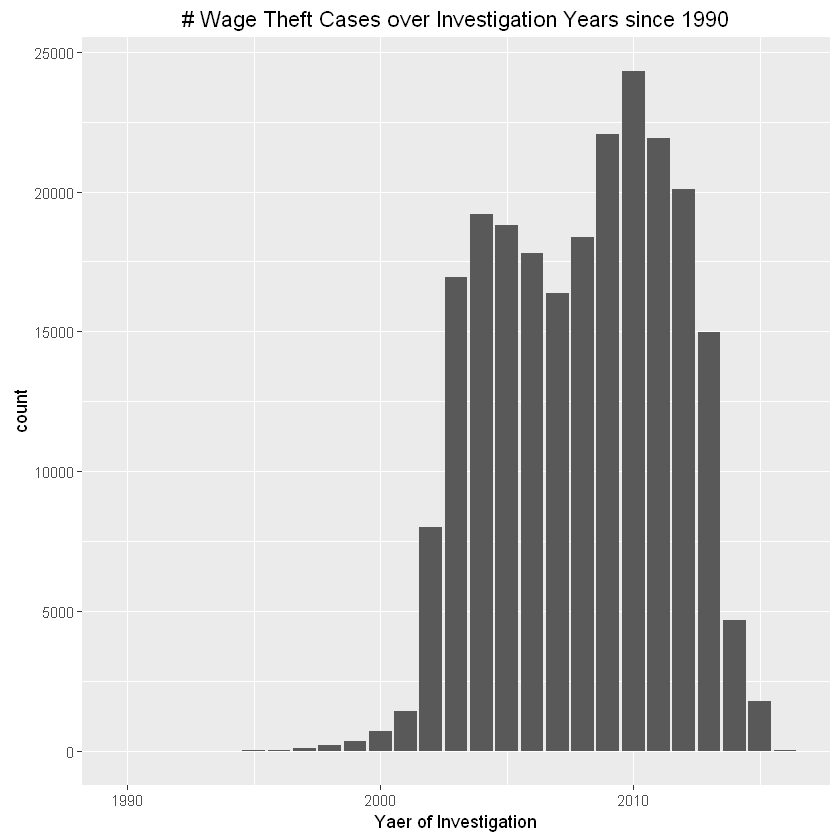

In [12]:
#Not too many data < year 1990. So truncate data at 1990
#Let's plot something
library(ggplot2)
ggplot(data = whd[whd$yr_strt >=1990, ], aes(x = yr_strt)) +
  geom_bar() +
  ggtitle("# Wage Theft Cases over Investigation Years since 1990")+
  xlab('Yaer of Investigation')

#What is the avg # cases during 2003 - 2013?
whd[whd$yr_strt >=2003 & whd$yr_strt <=2013, ] %>% 
        group_by(yr_strt) %>%
        summarise(N = n()) %>%
        summarise(mean = mean(N))

    

In [7]:
#Statistics by sector of industries
library(dplyr)

Cnt <- whd %>% 
    group_by(naic_cd_lvl2, naic_description_lvl2) %>% 
    summarise(N = n()) %>% 
    #arrange(desc(N))  #58137 missing industry description ??
    arrange(naic_description_lvl2)

#Why is there a 'T' at the end of the description? Get rid of it
whd$naic_description_lvl2 <- with(whd, substr(naic_description_lvl2, 1, nchar(naic_description_lvl2) - 1))


#Fill in description for some naic lvl2 codes
whd[whd$naic_cd_lvl2 %in% c("44", "45"), "naic_description_lvl2"] <- 'Retail Trade'
whd[whd$naic_cd_lvl2 %in% c("48", "49"), "naic_description_lvl2"] <- 'Transportation and Warehousing'
whd[whd$naic_cd_lvl2 %in% c("31", "32", "33"), "naic_description_lvl2"] <- 'Manufacturing'


------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:data.table':

    between, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



naic_description_lvl2,N
Accommodation and Food Services,45878
Health Care and Social Assistance,28077
Construction,26261
Retail Trade,25320
Administrative and Support and Waste Management and Remediation Services,16957
"Agriculture, Forestry, Fishing and Hunting",16401
Manufacturing,16022
Transportation and Warehousing,8953
Other Services (except Public Administration),8347
"Professional, Scientific, and Technical Services",6973


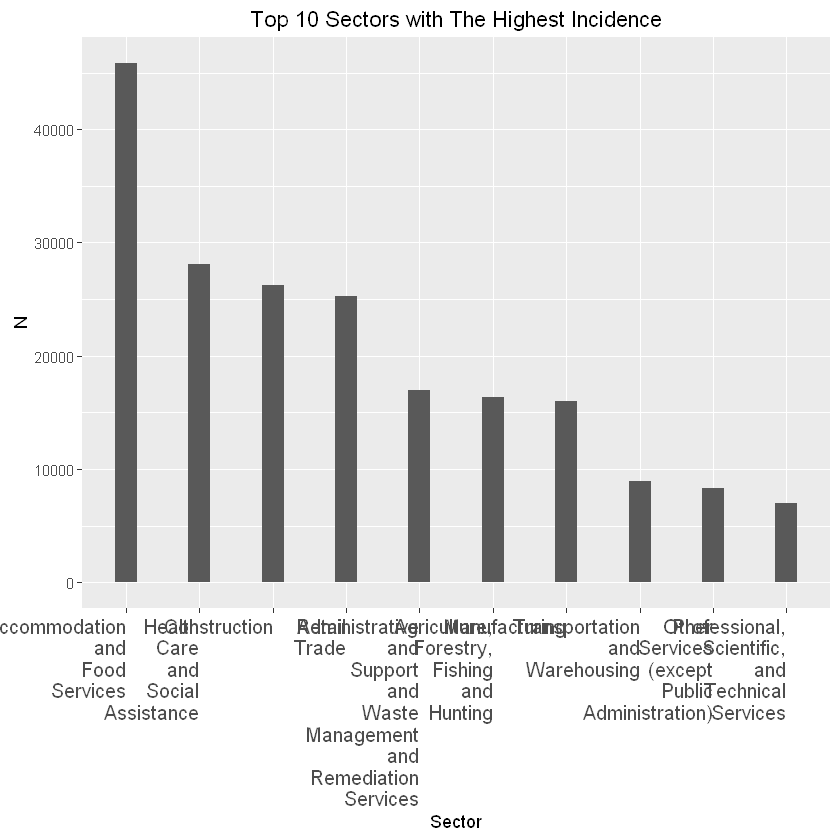

In [8]:
### 1. Cases per sector
cases <- whd %>% 
        group_by(naic_description_lvl2) %>% 
        summarise(N = n()) %>% 
        filter(naic_description_lvl2 != '') %>%
        arrange(desc(N))
cases

#Sort bars by descending stat
Sector_sort1 <- factor(cases$naic_description_lvl2, 
                      levels=cases$naic_description_lvl2)

levels(Sector_sort1) <- gsub(" ", "\n", levels(Sector_sort1))

#Top 10 Sectors with the highest incidence
ggplot(data = cases[1:10, ], aes(x = Sector_sort1[1:10], y = N)) +
  geom_bar(stat = "identity", width = 0.3) + 
  ggtitle("Top 10 Sectors with The Highest Incidence") +
  theme(axis.text.x = element_text(hjust = 1, size = 12)) + #angle = 60
  xlab("Sector")

naic_description_lvl2,med_ttl_bw
"Professional, Scientific, and Technical Services",1751.120
Management of Companies and Enterprises,1015.410
Real Estate and Rental and Leasing,889.170
Construction,782.310
Other Services (except Public Administration),764.400
Wholesale Trade,737.625
Finance and Insurance,715.895
Administrative and Support and Waste Management and Remediation Services,713.250
Health Care and Social Assistance,665.590
Educational Services,623.855


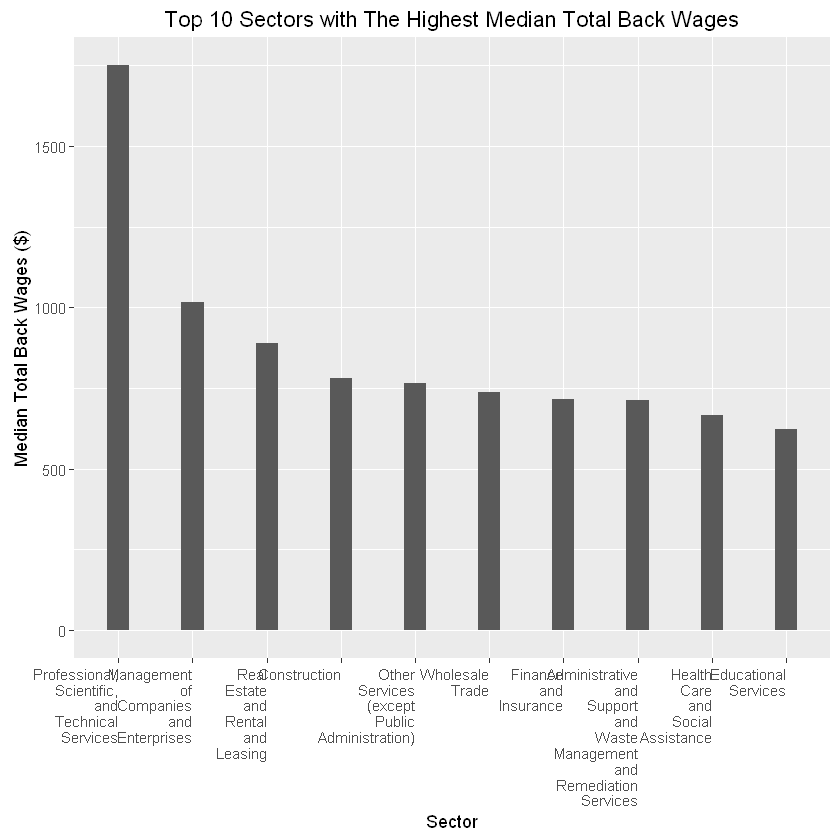

In [15]:
### 2. Median total back wages by industry sectors
tbw <- whd %>% 
    group_by(naic_description_lvl2) %>%  
    summarise(med_ttl_bw = median(bw_atp_amt)) %>%
    arrange(desc(med_ttl_bw))
tbw

#Create a factor to sort bars by descending stat
Sector_sort2 <- factor(tbw$naic_description_lvl2, 
                      levels=tbw$naic_description_lvl2)

levels(Sector_sort2) <- gsub(" ", "\n", levels(Sector_sort2))
  
#Top 10 Sectors with The Highest Median back wages
ggplot(data = tbw[1:10, ], aes(x = Sector_sort2[1:10], y = med_ttl_bw)) +
  geom_bar(stat = "identity", width = 0.3) + 
  ggtitle("Top 10 Sectors with The Highest Median Total Back Wages") +
  theme(axis.text.x = element_text(hjust = 1)) + #angle = 60
  ylab("Median Total Back Wages ($)") +
  xlab("Sector")

naic_description_lvl2,ttl_min_bw
Accommodation and Food Services,98.7640453
Health Care and Social Assistance,24.6576914
Manufacturing,23.6578815
Retail Trade,22.1964923
Administrative and Support and Waste Management and Remediation Services,14.4081452
Other Services (except Public Administration),13.1265320
Transportation and Warehousing,11.6687517
Finance and Insurance,9.4652314
Construction,8.0139925
"Arts, Entertainment, and Recreation",5.3330846


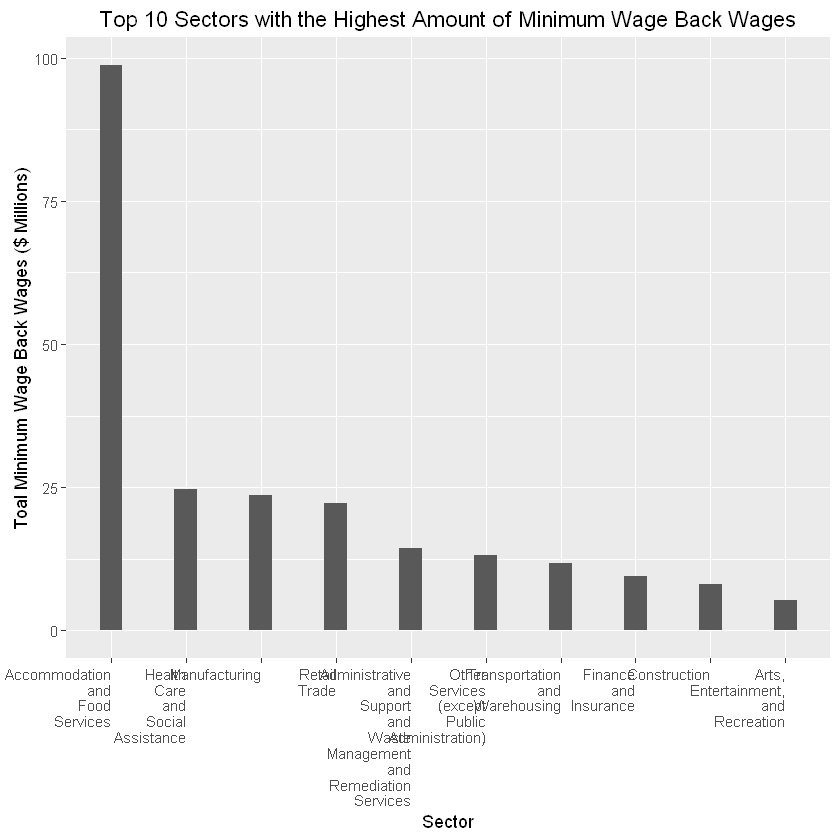

In [16]:
### 3. Total minimum wage back wages in millions
mbw <- whd %>% 
  group_by(naic_description_lvl2) %>%  
  summarise(ttl_min_bw = sum(flsa_mw_bw_atp_amt)/1000000) %>%
  arrange(desc(ttl_min_bw))
mbw

#Create a factor to sort sectors by descending stat
Sector_sort3 <- factor(mbw$naic_description_lvl2, 
                       levels=mbw$naic_description_lvl2)

levels(Sector_sort3) <- gsub(" ", "\n", levels(Sector_sort3))

#Top 10 Sectors with The Highest Mininum back wages
options(scipen = 99)
ggplot(data = mbw[1:10, ], aes(x = Sector_sort3[1:10], y = ttl_min_bw)) +
  geom_bar(stat = "identity", width = 0.3) + 
  ggtitle("Top 10 Sectors with the Highest Amount of Minimum Wage Back Wages") +
  theme(axis.text.x = element_text(hjust = 1)) + #angle = 60
  ylab("Toal Minimum Wage Back Wages ($ Millions)") +
  xlab("Sector")

In [ ]:
#*********************************************************************************************************************
#Conclusion:
#Most wages theft activities were recorded during years 2003 to 2013, with an average of 19000 cases per year.
#In general, back wages are very common in Accommodation and Food Services, Administrative and Support, Construction, 
#Health Care and Social Assistance, and Retail sectors.

